In [21]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("ObesityDataSet_Cleaned.csv")
df


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,Normal_Weight,24.39
1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,Normal_Weight,23.77
2,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,Overweight_Level_I,26.85
3,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,Overweight_Level_II,28.34
4,29.000000,1.620000,53.000000,0,1,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,2,0,Normal_Weight,20.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,Obesity_Type_III,44.90
1910,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,Obesity_Type_III,43.74
1911,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,Obesity_Type_III,43.54
1912,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,Obesity_Type_III,44.07


In [23]:
#Feature Selection
obese = df['NObeyesdad']
obese
features_to_drop = [
    'Weight',      # Outcome variable - menyebabkan circular reasoning
    'Height',      # Physical measurement - sudah implicit dalam behavioral patterns  
    'SMOKE',       # Kurang langsung terkait dengan pola obesitas
    'CH2O',        # Water intake - dampak minimal pada clustering perilaku
    'SCC',         # Calorie monitoring - perilaku yang jarang dan tidak konsisten
    'CALC',        # Alcohol consumption - dampak ambigu dan kompleks 
]
df = df.drop(columns="NObeyesdad")
df = df.drop(columns=features_to_drop)

df


,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,FAF,TUE,MTRANS,BMI
0,21.000000,1,0,2.0,3.0,2,0.000000,1.000000,3,24.39
1,23.000000,1,0,2.0,3.0,2,2.000000,1.000000,3,23.77
2,27.000000,0,0,3.0,3.0,2,2.000000,0.000000,4,26.85
3,22.000000,0,0,2.0,1.0,2,0.000000,0.000000,3,28.34
4,29.000000,0,1,2.0,3.0,2,0.000000,0.000000,0,20.20
...,...,...,...,...,...,...,...,...,...,...
1909,20.976842,1,1,3.0,3.0,2,1.676269,0.906247,3,44.90
1910,21.982942,1,1,3.0,3.0,2,1.341390,0.599270,3,43.74
1911,22.524036,1,1,3.0,3.0,2,1.414209,0.646288,3,43.54
1912,24.361936,1,1,3.0,3.0,2,1.139107,0.586035,3,44.07


In [24]:
#Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

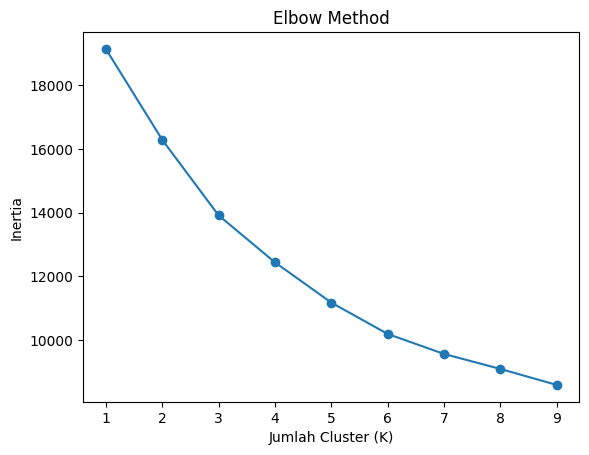

In [25]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [26]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df['Cluster'] = labels 
df['Obese'] = obese
df.head()


,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,FAF,TUE,MTRANS,BMI,Cluster,Obese
0,21.0,1,0,2.0,3.0,2,0.0,1.0,3,24.39,1,Normal_Weight
1,23.0,1,0,2.0,3.0,2,2.0,1.0,3,23.77,1,Normal_Weight
2,27.0,0,0,3.0,3.0,2,2.0,0.0,4,26.85,1,Overweight_Level_I
3,22.0,0,0,2.0,1.0,2,0.0,0.0,3,28.34,1,Overweight_Level_II
4,29.0,0,1,2.0,3.0,2,0.0,0.0,0,20.20,2,Normal_Weight


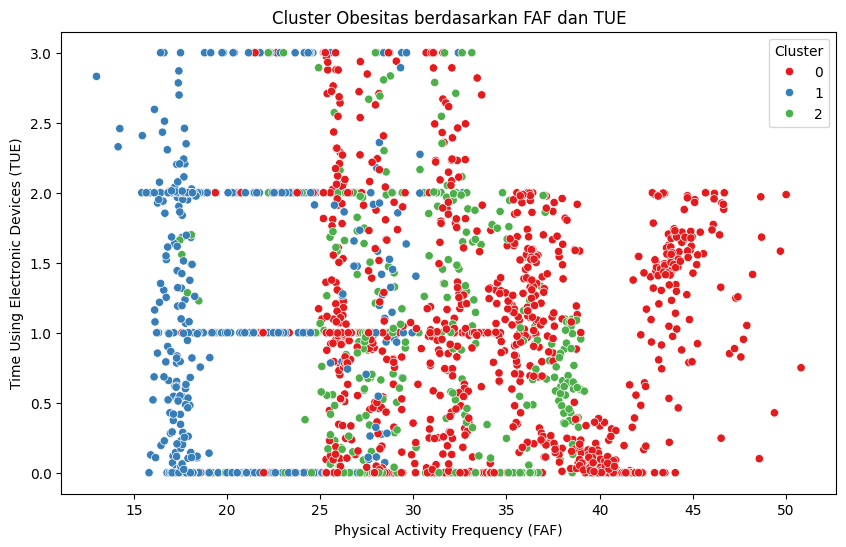

In [27]:
#Visualisasi Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='FAF', hue='Cluster', palette='Set1')
plt.title('Cluster Obesitas berdasarkan FAF dan TUE')
plt.xlabel('Physical Activity Frequency (FAF)')
plt.ylabel('Time Using Electronic Devices (TUE)')
plt.legend(title='Cluster')
plt.show()

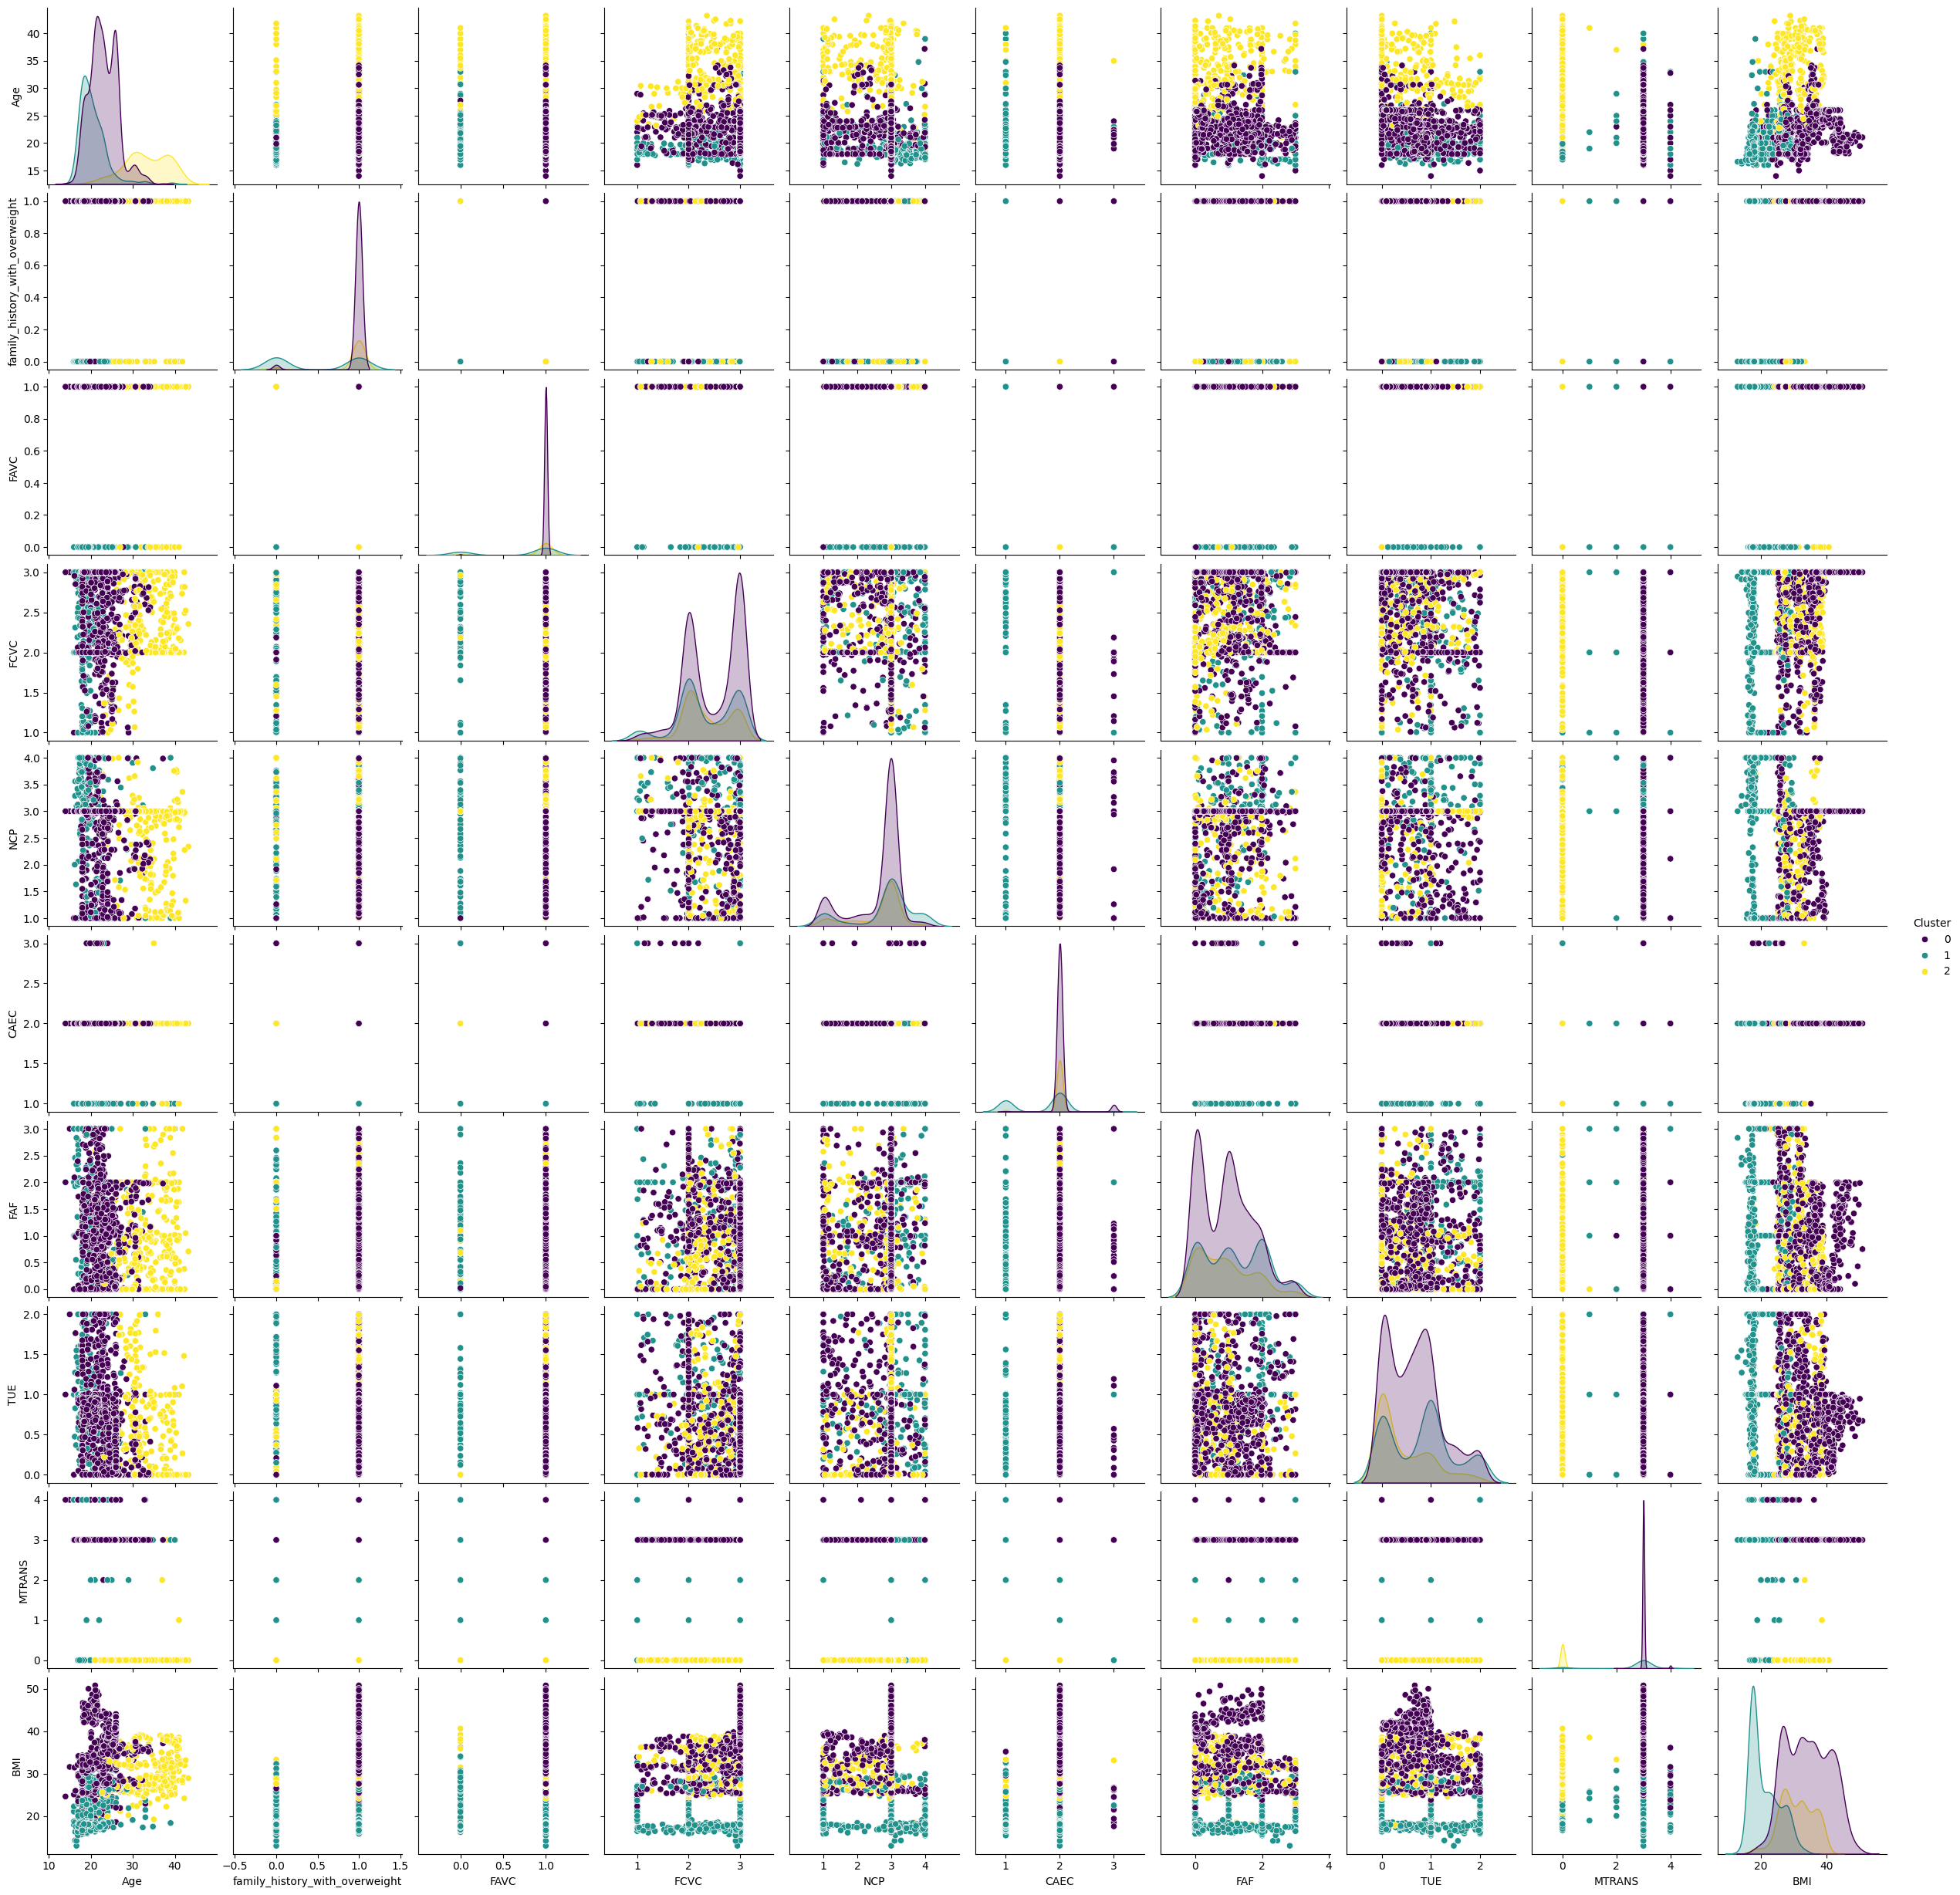

In [28]:
sampel = df.sample(n=500, random_state=42)

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [29]:
#shilhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.22471707651263473


In [30]:
#pake dataset label dan onehot encoding
df2 = pd.read_csv("CleanData2.csv")
df2

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,0,...,0,1,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,...,0,1,0,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,0,...,0,1,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,0,...,0,1,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,0,...,0,1,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,0,...,0,1,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,0,...,0,1,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,0,...,0,1,0,0,1,0,0,0,1,0


In [31]:
#Feature Selection
obese = df2['NObeyesdad']
obese

df2 = df2.drop(columns="NObeyesdad")

In [32]:
#Standardization
scaler = StandardScaler()
f_scaledd = scaler.fit_transform(df2)

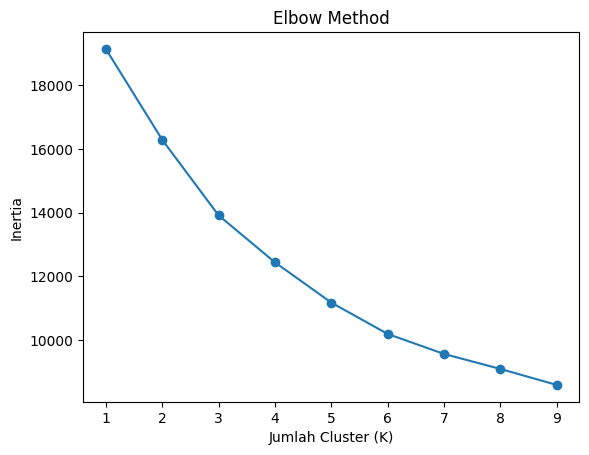

In [33]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [34]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df2['Cluster'] = labels  
df2['Obese'] = obese
df2.head()

ValueError: Length of values (1914) does not match length of index (2111)

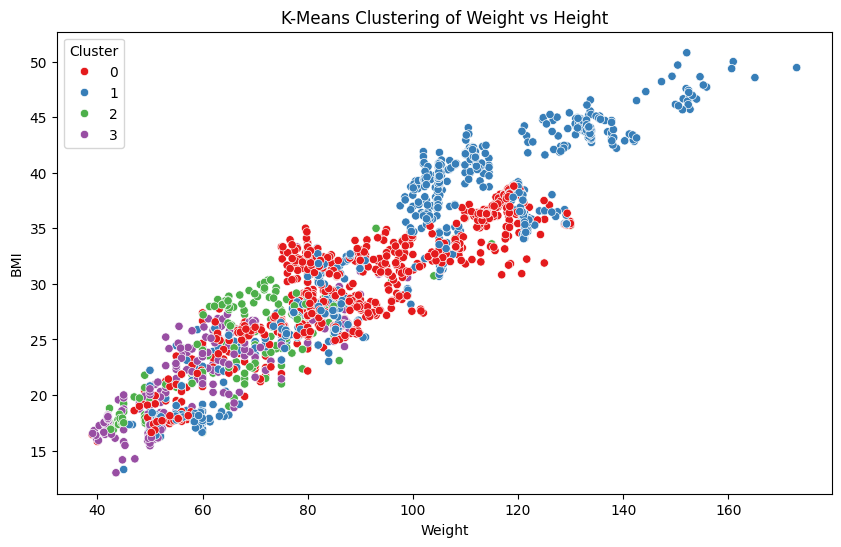

In [ ]:
#Visualisasi

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Weight', y='BMI', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering of Weight vs Height')
plt.show()

In [ ]:
#shilhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.16270711375577532
